In [1]:
import skimage.measure as measure
import numpy
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

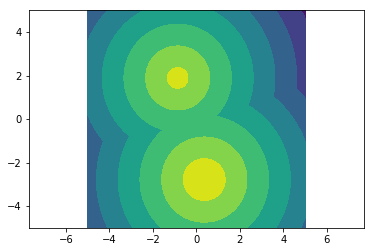

In [2]:
N = 1001

xmin = -5.0
xmax =  5.0
zmin = -5.0
zmax =  5.0

nsample = 2

rmin_sample = 0.0
rmax_sample = 2.0

xmin_sample = -3.0
xmax_sample =  3.0
zmin_sample = -3.0
zmax_sample =  3.0


X,Z = numpy.meshgrid(numpy.linspace(xmin,xmax,N),numpy.linspace(xmin,xmax,N))

X = numpy.transpose(X)
Z = numpy.transpose(Z)

x_center = xmin_sample + numpy.random.random_sample([nsample,])*(xmax_sample - xmin_sample)
z_center = zmin_sample + numpy.random.random_sample([nsample,])*(zmax_sample - zmin_sample)
radius = rmin_sample + numpy.random.random_sample([nsample,])*(rmax_sample - rmin_sample)

for i in range(nsample):
    if i == 0:
        phi = radius[i] - numpy.sqrt((X-x_center[i])**2 + (Z-z_center[i])**2)
    else:
        phi = numpy.maximum(phi,radius[i] - numpy.sqrt((X-x_center[i])**2 + (Z-z_center[i])**2))

plt.contourf(X,Z,phi)
plt.axis('equal')
plt.show()

In [3]:
bubble = measure.label(phi >= 0)

measurements = measure.regionprops_table(bubble, properties=('centroid',
                                                             'area',
                                                             'major_axis_length',
                                                             'minor_axis_length',
                                                             'perimeter'))

In [4]:
s = (N-1)/2
f = (xmax-xmin)/(N-1)

measurements['centroid-0'] = (measurements['centroid-0']-s)*f
measurements['centroid-1'] = (measurements['centroid-1']-s)*f
measurements['area'] = measurements['area']*f*f
measurements['major_axis_length'] = measurements['major_axis_length']*f
measurements['minor_axis_length'] = measurements['minor_axis_length']*f
measurements['perimeter'] = measurements['perimeter']*f

pd.DataFrame(measurements)

,centroid-0,centroid-1,area,major_axis_length,minor_axis_length,perimeter
0,-0.86,1.89,0.6991,0.944672,0.942259,3.095635
1,0.36,-2.79,2.8880,1.917785,1.917377,6.327838


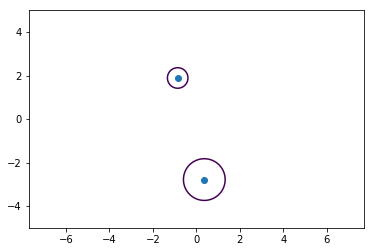

In [5]:
plt.contour(X,Z,phi,levels=[0])
plt.scatter(measurements['centroid-0'],measurements['centroid-1'])
plt.axis('equal')
plt.show()